In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [38]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


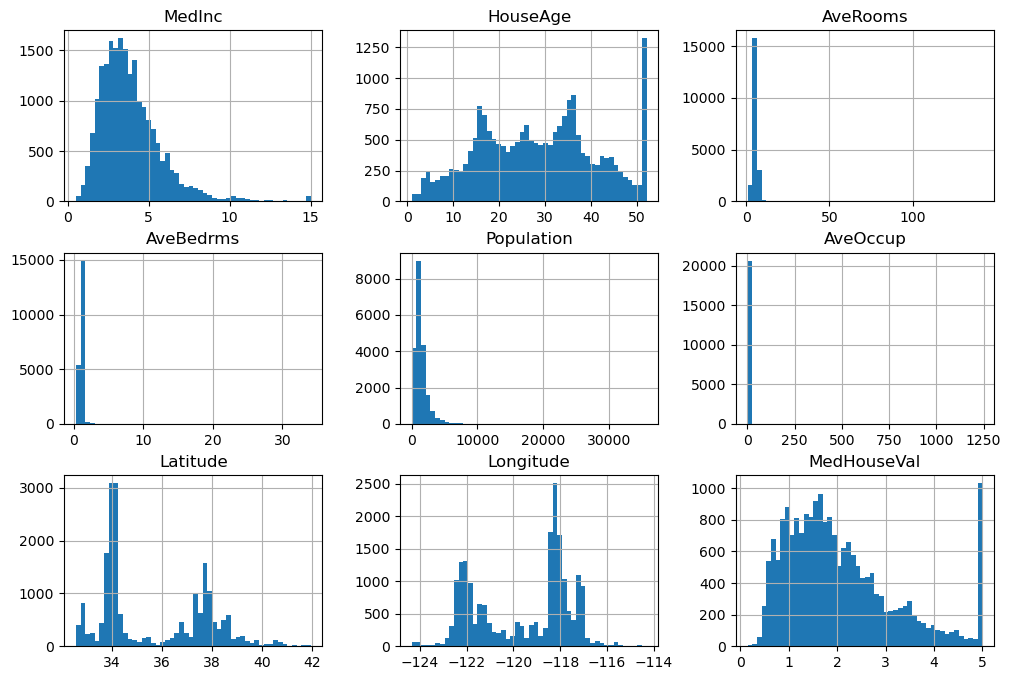

In [39]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [40]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


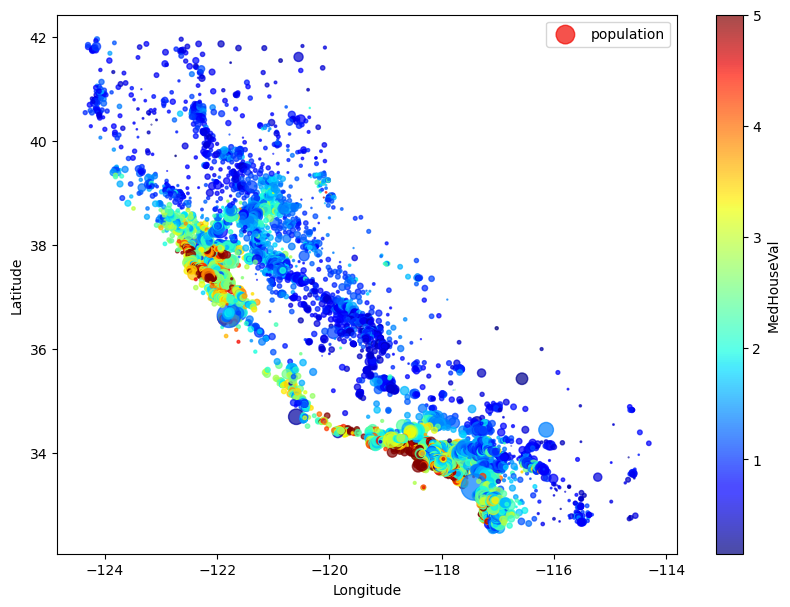

In [41]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

In [84]:
#The above plot displays the map of California, with the color map corresponding to house value and the radius of the circles corresponding to the population of the areas

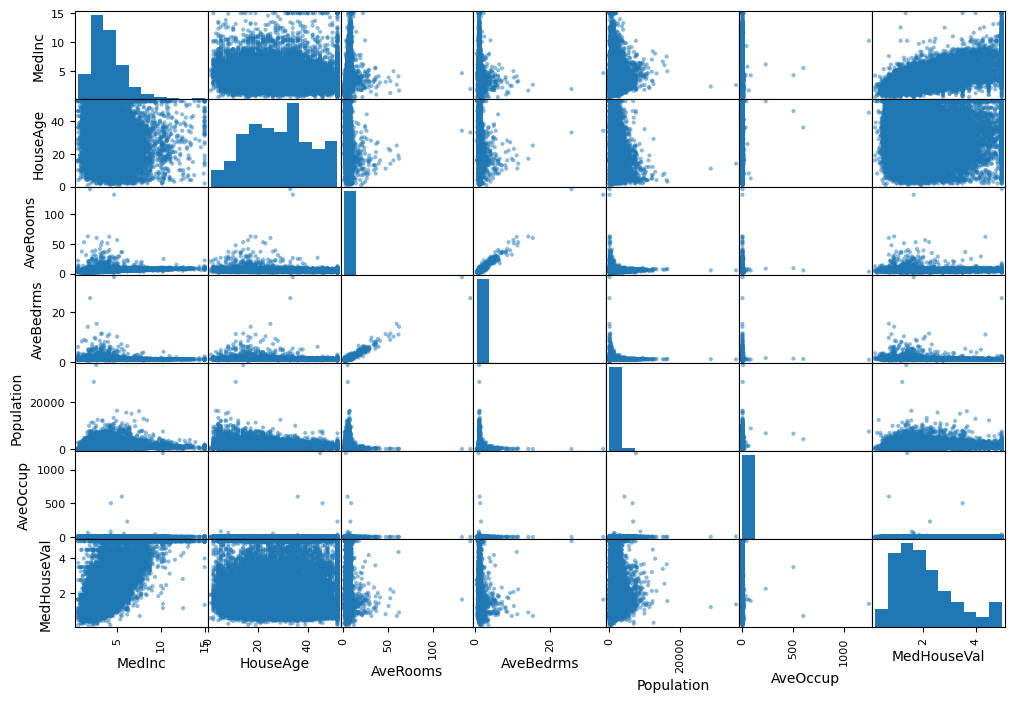

In [42]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

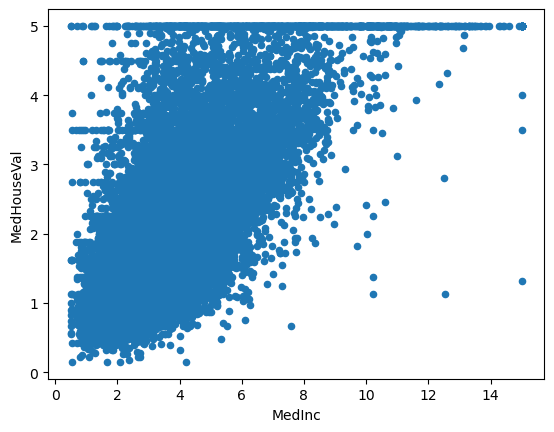

In [43]:
housing.plot(kind="scatter", x="MedInc",y="MedHouseVal")
plt.show()

In [14]:
#The above plot shows a strong linear correlation between Median Income and House Value.

In [44]:
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=True)

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [16]:
#As expected MedInc(Median Income) show a strong correlation.

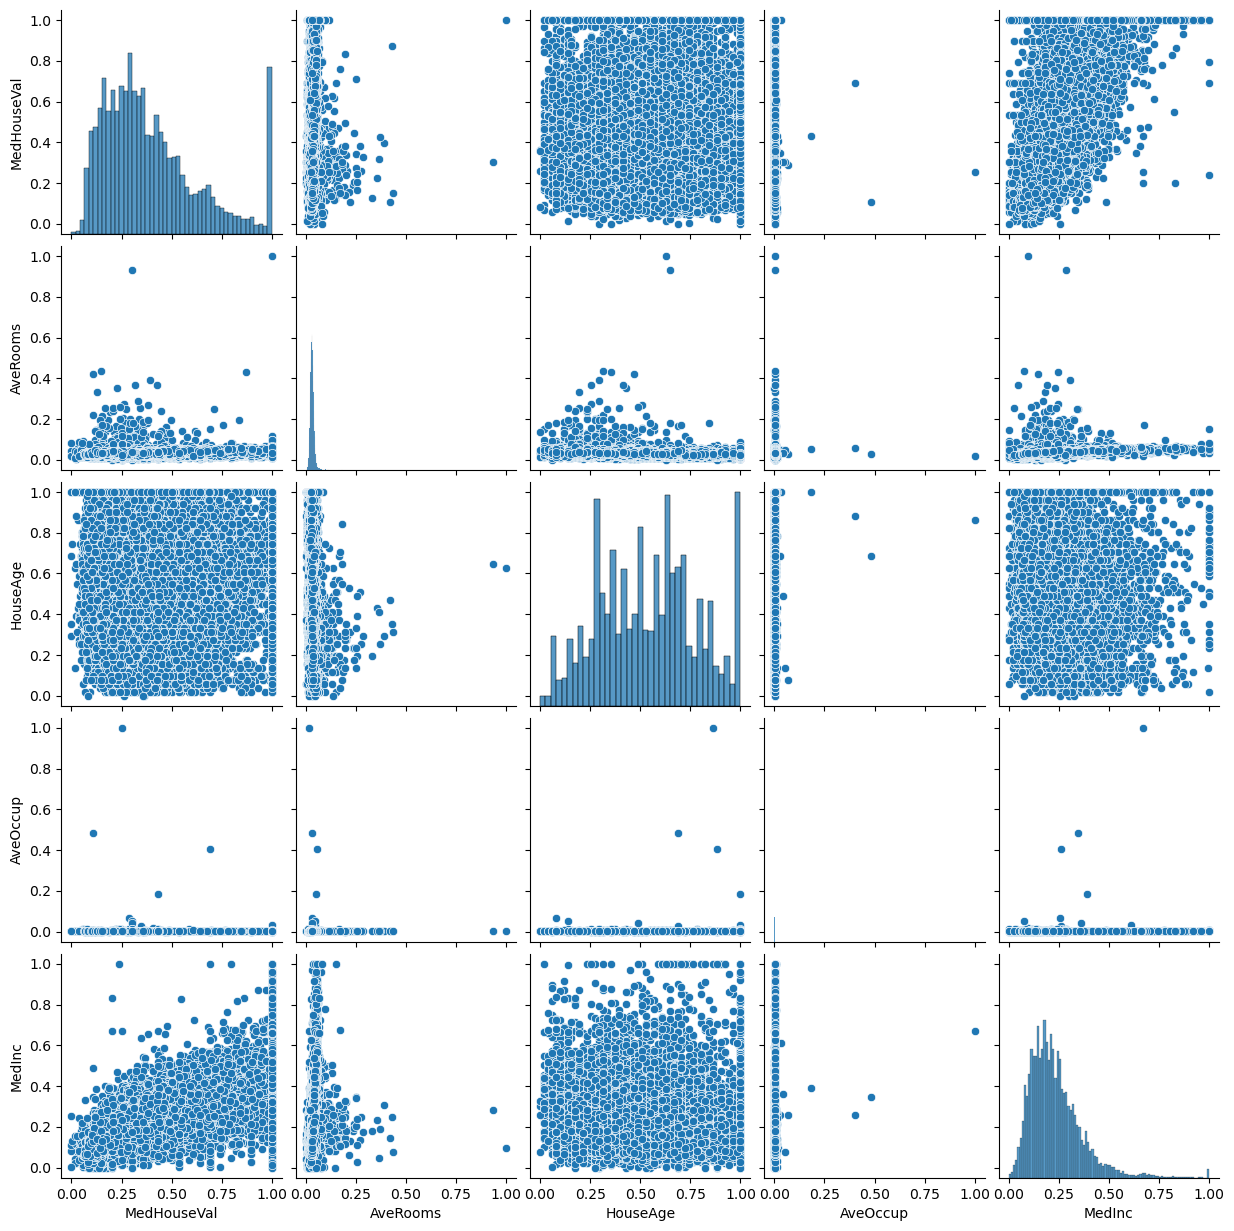

In [13]:
sns.pairplot(housing[['MedHouseVal', 'AveRooms', 'HouseAge', 'AveOccup', 'MedInc']])

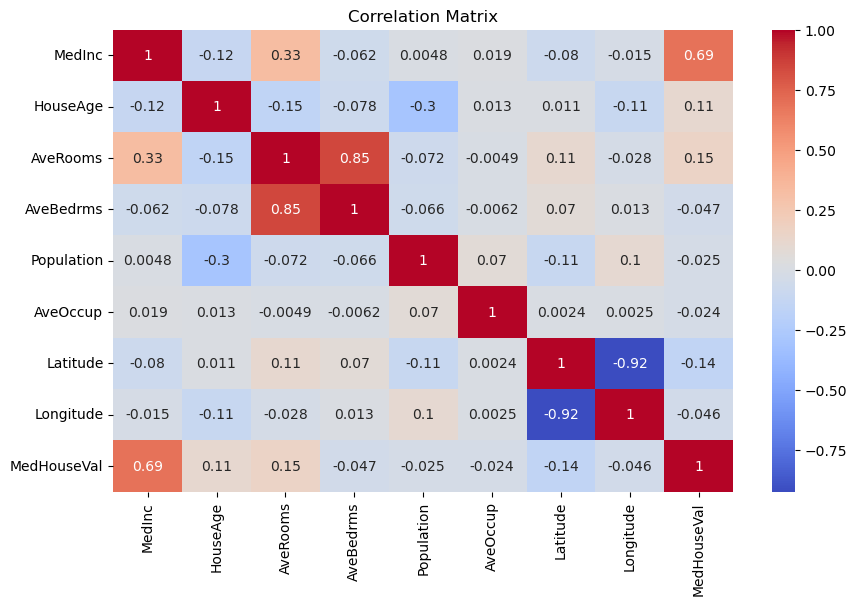

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
#find missing value
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [47]:
housing.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [25]:
#All the features are float and there are no categorical feature.
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,37.88,-122.23,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,37.86,-122.22,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,37.85,-122.24,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,37.85,-122.25,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,37.85,-122.25,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,39.48,-121.09,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,39.49,-121.21,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,39.43,-121.22,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,39.43,-121.32,0.143713


In [48]:
scalar1=MinMaxScaler()
housing1=scalar1.fit_transform(housing)

In [49]:
housing1=pd.DataFrame(housing1)

In [51]:
X = housing1.iloc[:,:-1]
y = housing1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [27]:
#For better accuracy, standard scaling is applied. The Pipeline first applies the standardScaler() function to the features and then calls the Linear Regression Model. Using a Pipeline makes the code cleaner, reusable, and reduces a lot of boilerplate code.

In [53]:
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

0.575787706032451

In [1]:
# use some different feature

In [54]:
#### Select features and target
X = housing[['AveRooms', 'HouseAge','MedInc', 'Longitude', 'Latitude']]
y = housing['MedHouseVal']

In [55]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [57]:
# Predict
y_pred = regression_pipeline.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.5813744243302474
Mean Squared Error: 0.5485707128789088
